C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Original Columns: Index(['Date', 'Daily minimum temperatures'], dtype='object')


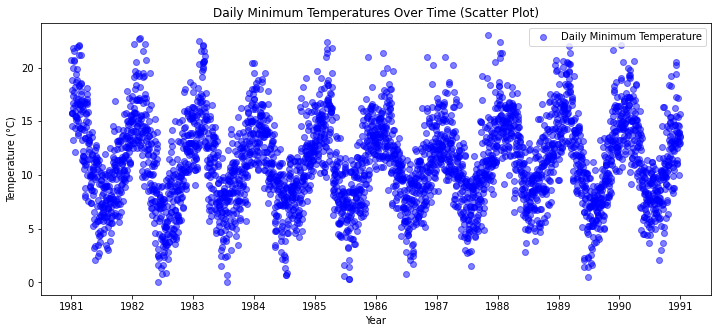

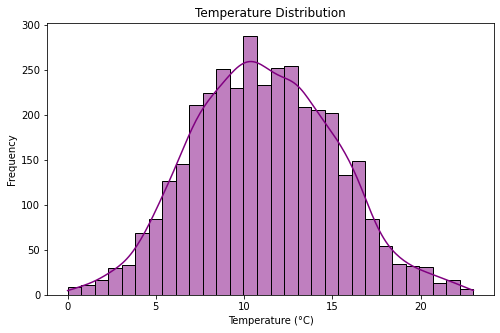

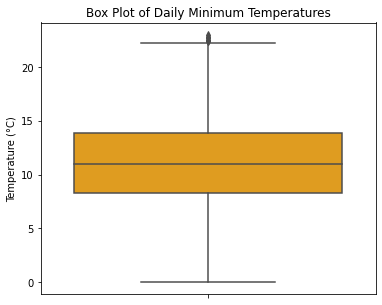

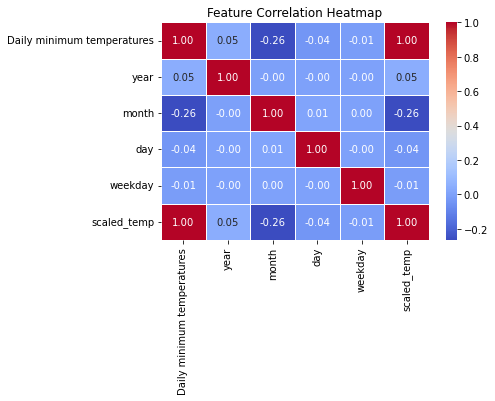

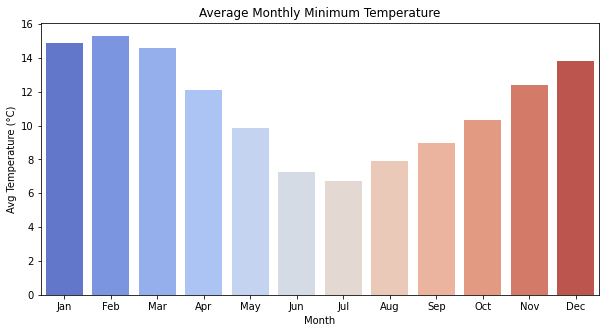

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('D:/221501043/daily-minimum-temperatures-in-me.csv')

# Check and clean column names
print("Original Columns:", data.columns)
data.columns = data.columns.str.strip()  # Remove extra spaces

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Convert temperature column to numeric
data['Daily minimum temperatures'] = pd.to_numeric(data['Daily minimum temperatures'], errors='coerce')

# Forward-fill missing values
data['Daily minimum temperatures'] = data['Daily minimum temperatures'].fillna(method='ffill')

# Remove outliers using Z-score method
z_scores = np.abs(stats.zscore(data['Daily minimum temperatures'].dropna()))
data = data[z_scores < 3]

# Extract additional date-related features
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.weekday

# Standardize temperature values
scaler = StandardScaler()
data['scaled_temp'] = scaler.fit_transform(data[['Daily minimum temperatures']])

# Fixing grouping operation
data_grouped = data.groupby(data.index)['Daily minimum temperatures'].mean()

# ========== Updated Visualizations ========== #

# 1. Scatter Plot: Temperature trend over time
plt.figure(figsize=(12, 5))
plt.scatter(data_grouped.index, data_grouped.values, label="Daily Minimum Temperature", color='b', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Daily Minimum Temperatures Over Time (Scatter Plot)')
plt.legend()
plt.show()

# 2. Histogram: Distribution of daily temperatures
plt.figure(figsize=(8, 5))
sns.histplot(data['Daily minimum temperatures'], bins=30, kde=True, color='purple')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

# 3. Box Plot: Checking for outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['Daily minimum temperatures'], color='orange')
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of Daily Minimum Temperatures')
plt.show()

# 4. Heatmap: Correlation between features
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Monthly Trend: Average temperature per month
plt.figure(figsize=(10, 5))
monthly_avg = data.groupby('month')['Daily minimum temperatures'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Avg Temperature (°C)')
plt.title('Average Monthly Minimum Temperature')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
